In [5]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from MeLting.utils import rename_features, construct_features_dictionary
from MeLting.statistics_helpers import *

In [10]:
features = construct_features_dictionary()
col_names = features["all"]  # which features do we want to use

path_data = "../MeLting/data/"
data_file_train = "melting_temperature_and_features_training_set.csv"
data = pd.read_csv(os.path.join(path_data, data_file_train))
X = data[col_names]
y = data["melt_temp_K"]

data_file_train_cluster1 = "melting_temperature_and_features_training_set_cluster1.csv"
data1 = pd.read_csv(os.path.join(path_data, data_file_train_cluster1))
X1 = data1[col_names]
y1 = data1["melt_temp_K"]

data_file_train_cluster2 = "melting_temperature_and_features_training_set_cluster2.csv"
data2 = pd.read_csv(os.path.join(path_data, data_file_train_cluster2))
X2 = data2[col_names]
y2 = data2["melt_temp_K"]

### Pearson correlation analysis

In [11]:
# calculate correlation matrix
all_features = col_names + ["melt_temp_K"]
series = []
for cluster in [data, data1, data2]:
    featureVector = cluster[all_features]
    corrMatrix = featureVector.corr()
    series.append(corrMatrix)

In [12]:
# selected features for the plot
selected_features = features["dft"] + ["melt_temp_K"]

# correlation matrix of selected features in the entire training set
series[0][selected_features].loc[selected_features]

,coh_en,bulk_m,shear_m,form_e_per_atom,density,%ic,melt_temp_K
coh_en,1.000000,0.833651,0.785523,-0.358817,0.468493,0.111545,0.823884
bulk_m,0.833651,1.000000,0.932698,-0.045028,0.647212,-0.138112,0.780497
shear_m,0.785523,0.932698,1.000000,0.084311,0.469169,-0.245857,0.801537
form_e_per_atom,-0.358817,-0.045028,0.084311,1.000000,0.098055,-0.820303,-0.094994
density,0.468493,0.647212,0.469169,0.098055,1.000000,-0.238077,0.469636
%ic,0.111545,-0.138112,-0.245857,-0.820303,-0.238077,1.000000,-0.074753
melt_temp_K,0.823884,0.780497,0.801537,-0.094994,0.469636,-0.074753,1.000000


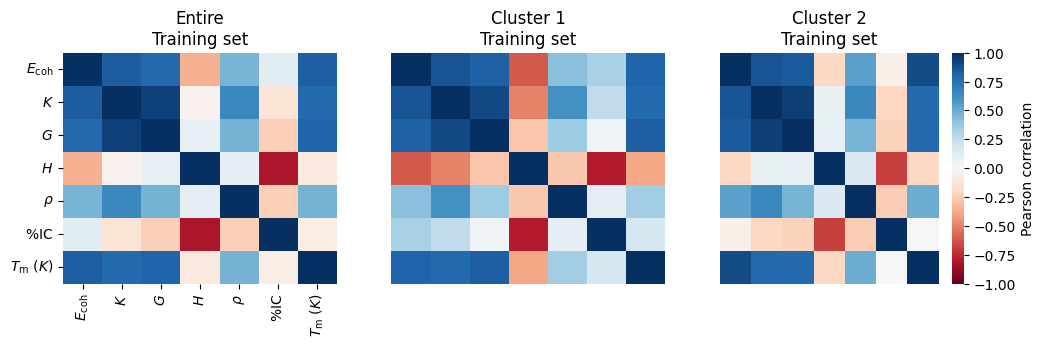

In [13]:
# Now we can plot the correlation matrix

ticks = rename_features(selected_features)

fig, (ax0, ax1, ax2) = plt.subplots(
    1, 3, figsize=(12, 3), gridspec_kw={"width_ratios": [1, 1, 1]}
)

ax0.set_title("Entire\nTraining set")
g0 = sns.heatmap(
    series[0][selected_features].loc[selected_features],
    ax=ax0,
    cmap="RdBu",
    cbar=False,
    yticklabels=ticks,
    xticklabels=ticks,
    vmin=-1,
    vmax=1,
    center=0,
)
ax0.set_yticklabels(ticks, rotation=0)
ax0.set_xticklabels(ticks, rotation=90)

ax1.set_title("Cluster 1\nTraining set")
g1 = sns.heatmap(
    series[1][selected_features].loc[selected_features],
    ax=ax1,
    cmap="RdBu",
    cbar=False,
    yticklabels=False,
    xticklabels=False,
    vmin=-1,
    vmax=1,
    center=0,
)

ax2.set_title("Cluster 2\nTraining set")
g2 = sns.heatmap(
    series[2][selected_features].loc[selected_features],
    ax=ax2,
    cmap="RdBu",
    yticklabels=False,
    xticklabels=False,
    vmin=-1,
    vmax=1,
    center=0,
    cbar_kws={"label": "Pearson correlation"},
)

### Distribution of features across clusters

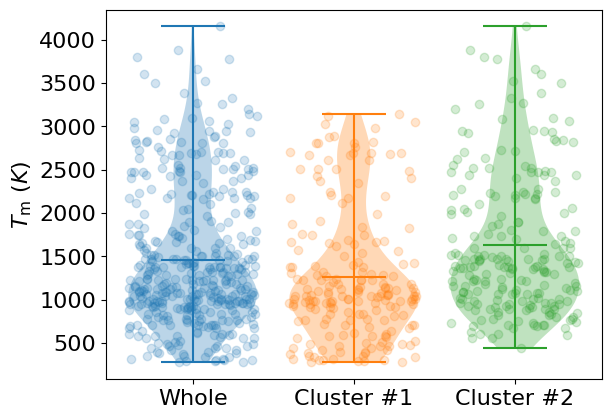

In [14]:
# feature distribution

y_axis_feature = "melt_temp_K"
y_axis_label = rename_features([y_axis_feature])[0]

plt.violinplot(data[y_axis_feature], positions=[0], widths=0.8, showmeans=True)
plt.scatter(np.random.uniform(0 - 0.4, 0 + 0.4, size=len(y)), y, alpha=0.2)
plt.violinplot(data1[y_axis_feature], positions=[1], widths=0.8, showmeans=True)
plt.scatter(np.random.uniform(1 - 0.4, 1 + 0.4, size=len(y1)), y1, alpha=0.2)
plt.violinplot(data2[y_axis_feature], positions=[2], widths=0.8, showmeans=True)
plt.scatter(np.random.uniform(2 - 0.4, 2 + 0.4, size=len(y2)), y2, alpha=0.2)


plt.ylabel(y_axis_label, size=16)
plt.xticks([0, 1, 2], ["Whole", "Cluster #1", "Cluster #2"], size=16)
plt.yticks(size=16);
# plt.ylim([260,4260]);

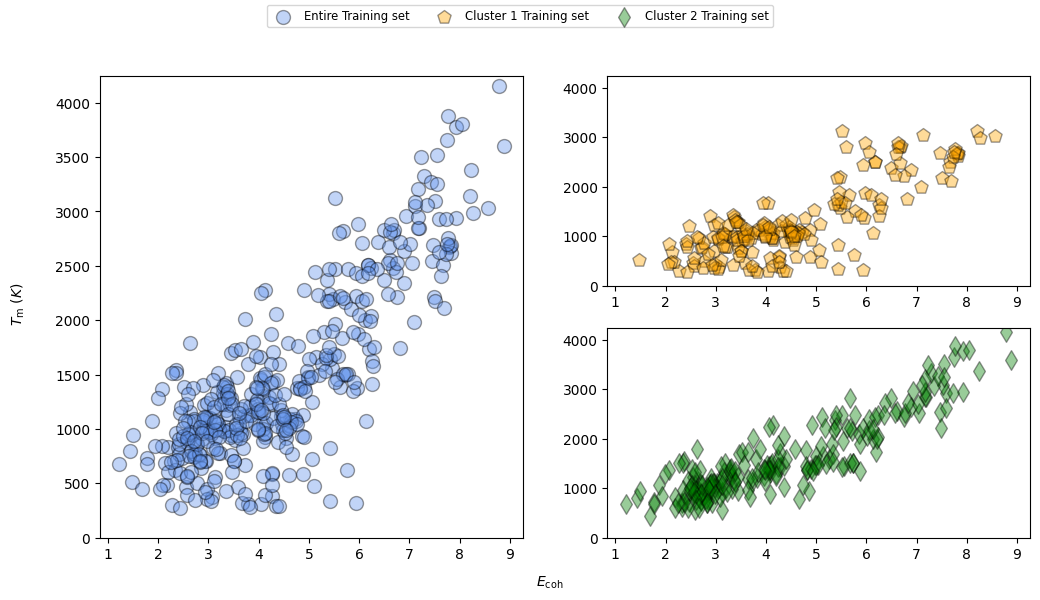

In [15]:
# feature 1 vs feature 2 (or melting temperature) plot

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2, 2)

x_axis_feature = "coh_en"
x_axis_label = rename_features([x_axis_feature])[0]

y_axis_feature = "melt_temp_K"
y_axis_label = rename_features([y_axis_feature])[0]

ax0 = fig.add_subplot(gs[:, 0])
l0 = ax0.scatter(
    x=data[x_axis_feature],
    y=data[y_axis_feature],
    marker="o",
    alpha=0.4,
    s=100,
    color="cornflowerblue",
    edgecolors="black",
    label="Entire Training set",
)
ax0.set_ylabel(ylabel=None)
ax0.set_xlabel(xlabel=None)

ax1 = fig.add_subplot(gs[0, 1], sharex=ax0)
l1 = ax1.scatter(
    x=data1[x_axis_feature],
    y=data1[y_axis_feature],
    marker="p",
    alpha=0.4,
    s=100,
    color="orange",
    edgecolors="black",
    label="Cluster 1 Training set",
)
ax1.set_ylabel(ylabel=None)
ax1.set_xlabel(xlabel=None)

ax2 = fig.add_subplot(gs[1, 1], sharex=ax1)
l2 = ax2.scatter(
    x=data2[x_axis_feature],
    y=data2[y_axis_feature],
    marker="d",
    alpha=0.4,
    s=100,
    color="green",
    edgecolors="black",
    label="Cluster 2 Training set",
)
ax2.set_ylabel(ylabel=None)
ax2.set_xlabel(xlabel=None)

ax0.set_ylim([0, 4250])
ax1.set_ylim([0, 4250])
ax2.set_ylim([0, 4250])

fig.text(0.05, 0.5, y_axis_label, va="center", rotation="vertical")
fig.text(0.5, 0.03, x_axis_label, ha="center")

fig.legend(
    handles=[l0, l1, l2],
    labels=["Entire Training set", "Cluster 1 Training set", "Cluster 2 Training set"],
    loc="upper center",
    fontsize="small",
    ncol=3,
);

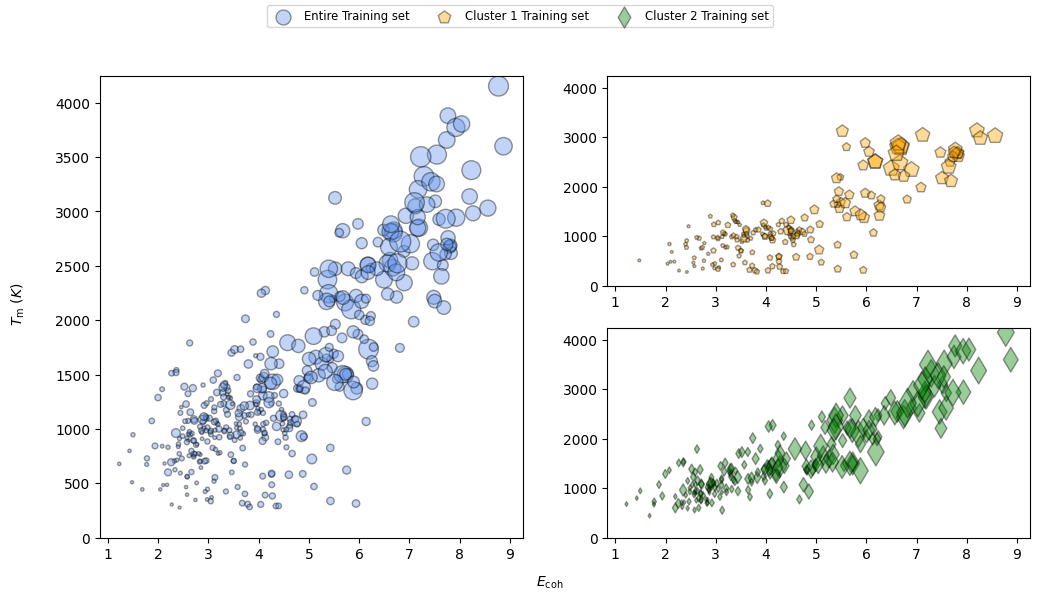

In [16]:
# feature 1 vs feature 2 (or melting temperature) plot
# markers are sized according to a secondary feature

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2, 2)

x_axis_feature = "coh_en"
x_axis_label = rename_features([x_axis_feature])[0]

y_axis_feature = "melt_temp_K"
y_axis_label = rename_features([y_axis_feature])[0]

marker_size_feature_column = "shear_m"

ax0 = fig.add_subplot(gs[:, 0])
l0 = ax0.scatter(
    x=data[x_axis_feature],
    y=data[y_axis_feature],
    s=data[marker_size_feature_column],
    marker="o",
    alpha=0.4,
    color="cornflowerblue",
    edgecolors="black",
    label="Entire Training set",
)
ax0.set_ylabel(ylabel=None)
ax0.set_xlabel(xlabel=None)

ax1 = fig.add_subplot(gs[0, 1], sharex=ax0)
l1 = ax1.scatter(
    x=data1[x_axis_feature],
    y=data1[y_axis_feature],
    s=data1[marker_size_feature_column],
    marker="p",
    alpha=0.4,
    color="orange",
    edgecolors="black",
    label="Cluster 1 Training set",
)
ax1.set_ylabel(ylabel=None)
ax1.set_xlabel(xlabel=None)

ax2 = fig.add_subplot(gs[1, 1], sharex=ax1)
l2 = ax2.scatter(
    x=data2[x_axis_feature],
    y=data2[y_axis_feature],
    s=data2[marker_size_feature_column],
    marker="d",
    alpha=0.4,
    color="green",
    edgecolors="black",
    label="Cluster 2 Training set",
)
ax2.set_ylabel(ylabel=None)
ax2.set_xlabel(xlabel=None)

ax0.set_ylim([0, 4250])
ax1.set_ylim([0, 4250])
ax2.set_ylim([0, 4250])

fig.text(0.05, 0.5, y_axis_label, va="center", rotation="vertical")
fig.text(0.5, 0.03, x_axis_label, ha="center")

fig.legend(
    handles=[l0, l1, l2],
    labels=["Entire Training set", "Cluster 1 Training set", "Cluster 2 Training set"],
    loc="upper center",
    fontsize="small",
    ncol=3,
);

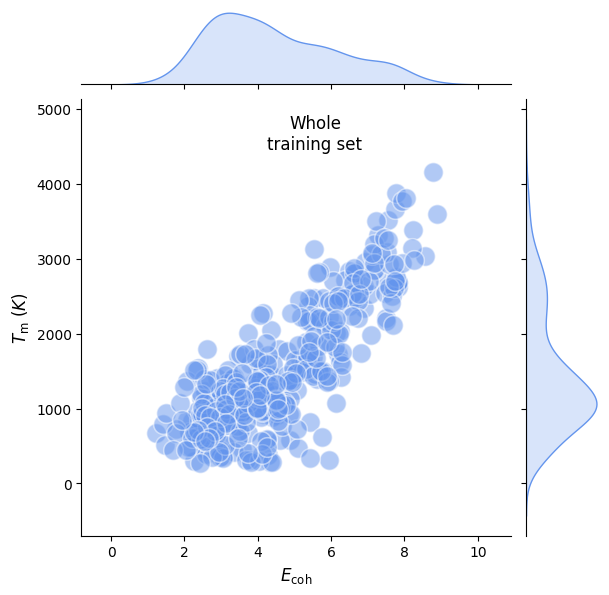

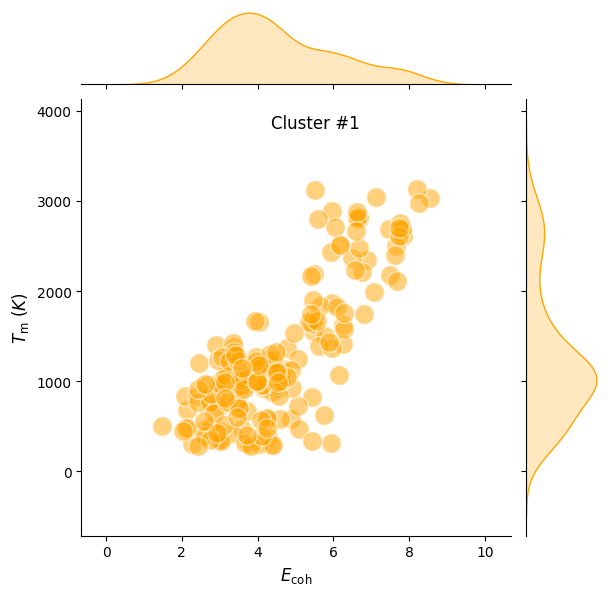

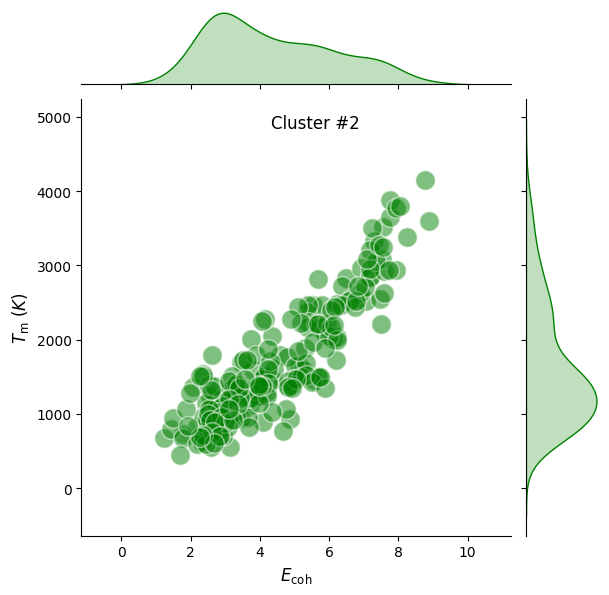

In [17]:
# nicer plot also including densities

x_axis_feature = "coh_en"
x_axis_label = rename_features([x_axis_feature])[0]

y_axis_feature = "melt_temp_K"
y_axis_label = rename_features([y_axis_feature])[0]

p0 = sns.JointGrid(data=data, x=x_axis_feature, y=y_axis_feature)
p0.plot_joint(sns.scatterplot, color="cornflowerblue", alpha=0.5, s=200)
p0.fig.suptitle("Whole\ntraining set", x=0.5, y=0.8, size=12)
p0.plot_marginals(sns.kdeplot, color="cornflowerblue", shade=True)
p0.set_axis_labels(x_axis_label, y_axis_label, fontsize=12)
# plt.ylim([0,4250])
# plt.xlim([1,10])

p1 = sns.JointGrid(data=data1, x=x_axis_feature, y=y_axis_feature)
p1.plot_joint(sns.scatterplot, color="orange", alpha=0.5, s=200)
p1.plot_marginals(sns.kdeplot, color="orange", shade=True)
p1.fig.suptitle("Cluster #1", x=0.5, y=0.8, size=12)
p1.set_axis_labels(x_axis_label, y_axis_label, fontsize=12)
# plt.ylim([0,4250])
# plt.xlim([1,10])

p2 = sns.JointGrid(data=data2, x=x_axis_feature, y=y_axis_feature)
p2.plot_joint(sns.scatterplot, color="green", alpha=0.5, s=200)
p2.plot_marginals(sns.kdeplot, color="green", shade=True)
p2.fig.suptitle("Cluster #2", x=0.5, y=0.8, size=12)
p2.set_axis_labels(x_axis_label, y_axis_label, fontsize=12);
# plt.ylim([0,4250])
# plt.xlim([1,10])

### PCA after clustering

In [18]:
selected_features_for_clustering = [
    "%ic",
    "electro_aveX",
    "electro_sdX",
    "group_aveX",
    "group_sdX",
    "row_aveX",
    "row_sdX",
]
all_features = features["all"]

X = data[selected_features_for_clustering]
y = data["melt_temp_K"]

X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

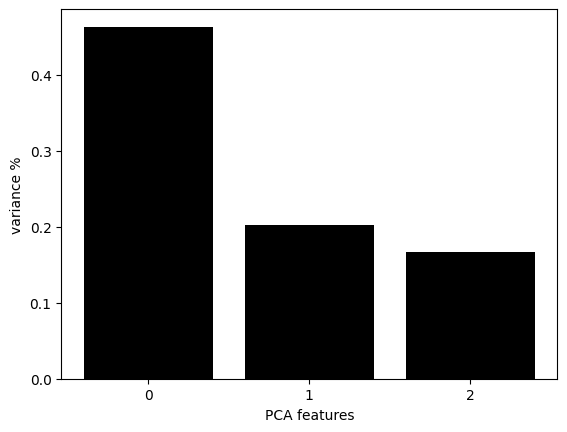

In [19]:
# Plot the explained variances
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_, color="black")
plt.xlabel("PCA features")
plt.ylabel("variance %")
plt.xticks(range(pca.n_components_));

In [20]:
is_cluster2 = [comp in data2.Compound.values for comp in data.Compound]
is_cluster1 = [not elem for elem in is_cluster2]
color = ListedColormap(["green" if i == 1 else "orange" for i in cluster])

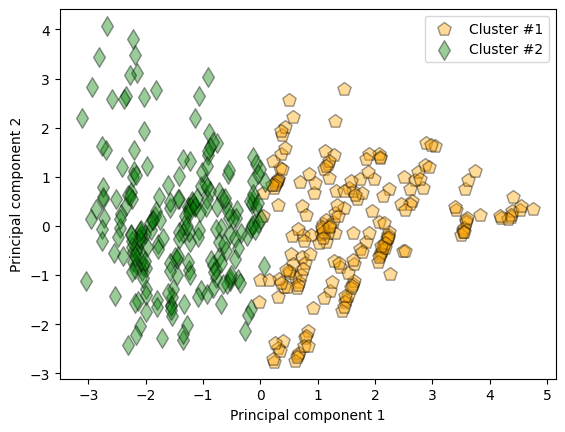

In [21]:
# clustering does the right job, as expected

fig, ax = plt.subplots()

scatter = plt.scatter(
    PCA_components[0][is_cluster1],
    PCA_components[1][is_cluster1],
    marker="p",
    alpha=0.4,
    s=100,
    color="orange",
    edgecolors="black",
)
scatter = plt.scatter(
    PCA_components[0][is_cluster2],
    PCA_components[1][is_cluster2],
    marker="d",
    alpha=0.4,
    s=100,
    color="green",
    edgecolors="black",
)
plt.legend(["Cluster #1", "Cluster #2"], loc="best")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2");
# plt.xticks(fontsize=16);
# plt.yticks(fontsize=16);
# plt.title('All features', fontsize=16);

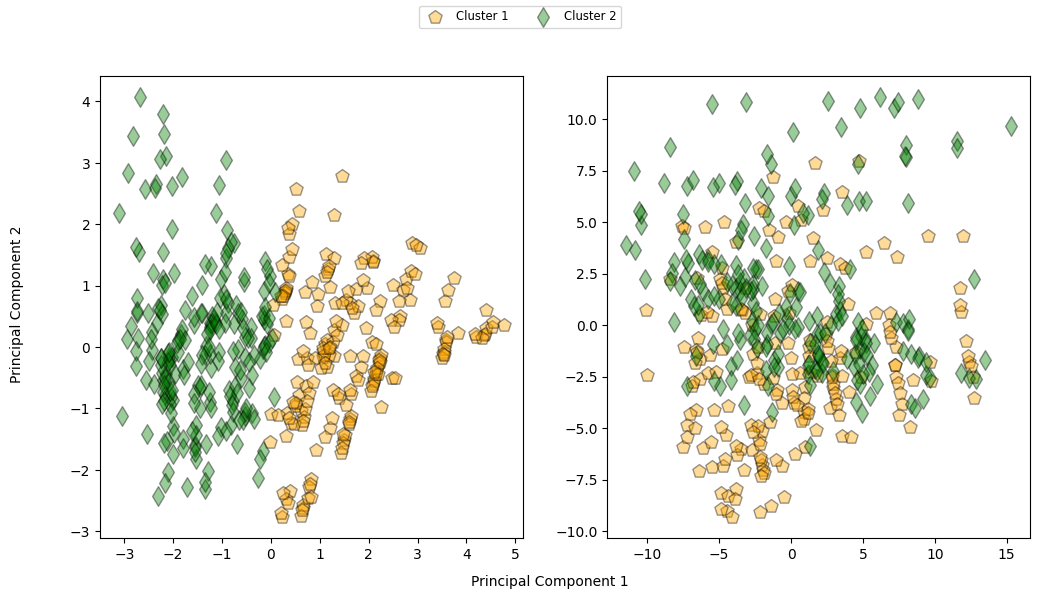

In [22]:
# Comparison between PCA spaces based on
# (left) selected features for clustering
# (right) all features

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

col_names = [
    "%ic",
    "electro_aveX",
    "electro_sdX",
    "group_aveX",
    "group_sdX",
    "row_aveX",
    "row_sdX",
]
X = data[col_names]
y = data["melt_temp_K"]
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)
PCA_components = pd.DataFrame(principalComponents)
is_cluster2 = [comp in data2.Compound.values for comp in data.Compound]
is_cluster1 = [not elem for elem in is_cluster2]
color = ListedColormap(["green" if i == 1 else "orange" for i in cluster])
l0 = ax0.scatter(
    PCA_components[0][is_cluster1],
    PCA_components[1][is_cluster1],
    marker="p",
    alpha=0.4,
    s=100,
    color="orange",
    edgecolors="black",
)
l1 = ax0.scatter(
    PCA_components[0][is_cluster2],
    PCA_components[1][is_cluster2],
    marker="d",
    alpha=0.4,
    s=100,
    color="green",
    edgecolors="black",
)

col_names = features["all"]
X = data[col_names]
y = data["melt_temp_K"]
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)
PCA_components = pd.DataFrame(principalComponents)
is_cluster2 = [comp in data2.Compound.values for comp in data.Compound]
is_cluster1 = [not elem for elem in is_cluster2]
color = ListedColormap(["green" if i == 1 else "orange" for i in cluster])
ax1.scatter(
    PCA_components[0][is_cluster1],
    PCA_components[1][is_cluster1],
    marker="p",
    alpha=0.4,
    s=100,
    color="orange",
    edgecolors="black",
)
ax1.scatter(
    PCA_components[0][is_cluster2],
    PCA_components[1][is_cluster2],
    marker="d",
    alpha=0.4,
    s=100,
    color="green",
    edgecolors="black",
)

fig.text(0.05, 0.5, "Principal Component 2", va="center", rotation="vertical")
fig.text(0.5, 0.03, "Principal Component 1", ha="center")
fig.legend(
    handles=[l0, l1],
    labels=["Cluster 1", "Cluster 2"],
    loc="upper center",
    fontsize="small",
    ncol=2,
);